In [2]:
using Interpolations
using NPZ
using Plots
using PyPlot 
import PyPlot
using LaTeXStrings
using Statistics
using PyCall
using FFTW

In [3]:
using Printf
using Plots.PlotMeasures

In [92]:
filepath = "/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/11_visc_old_nodiff.scratch/"

"/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/11_visc_old_nodiff.scratch/"

In [108]:
include("fftUtils.jl")
using .fftUtils

In [5]:
q = npzread(filepath * "q_mpi.npy");

In [6]:
Bpsi = npzread(filepath * "b_hat_rho_mpi.npy");

In [7]:
# Fourier Transform
F = fft(Bpsi,[2,3]);

In [8]:
# getting the dimensions
rdim = size(Bpsi)[1];
ufdim = size(Bpsi)[2];
fidim = size(Bpsi)[3];
tdim = size(Bpsi)[4];
time_list = LinRange(1,tdim,tdim);
psin_list = LinRange(0,1.0,rdim);
uf_list = LinRange(0,2*pi,ufdim);
fi_list = LinRange(0,2*pi,fidim);
Nn = fidim;
Nm = ufdim;

In [9]:
qPrime = fftUtils.q_prime(q,1/100);

In [10]:
# magnetic perturbation at time steps of most interest:
# t1: just when instability starts
# t2: during instability development
# t3: when instability saturates
# t4: long after saturation
t1 = 5;
t2 = 21;
t3 = 43; 
t4 = 53;
Bt1 = Bpsi[:,:,:,t1];
Bt2 = Bpsi[:,:,:,t2];
Bt3 = Bpsi[:,:,:,t3];
Bt4 = Bpsi[:,:,:,t4];
F1 = F[:,:,:,t1];
F2 = F[:,:,:,t2];
F3 = F[:,:,:,t3];
F4 = F[:,:,:,t4];

In [11]:
t1code = 53;
t2code = 200;
t3code = 406;
t4code = 501;

In [114]:
ns,ms,maxbnm,nisl,misl,isl_width,islands3 = fftUtils.n_m_max(F4,q,t4);

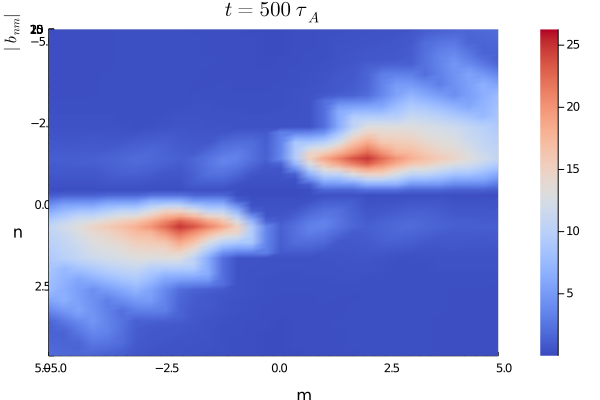

In [103]:
deg=90
Plots.scatter(ns,ms,maxbnm,zlabel=L"|b_{nm}|",camera=(deg,deg),st=:surface,c=:coolwarm,xlims=(-5,5),ylims=(-5,5) #=xlims=(-Nn/2,Nn/2),ylims=(-Nm/2,Nm/2)=#,xminorticks=10,yminorticks=10)
xlabel!("n")
ylabel!("m")
title!(L"t = 500 \; \tau_{A}")

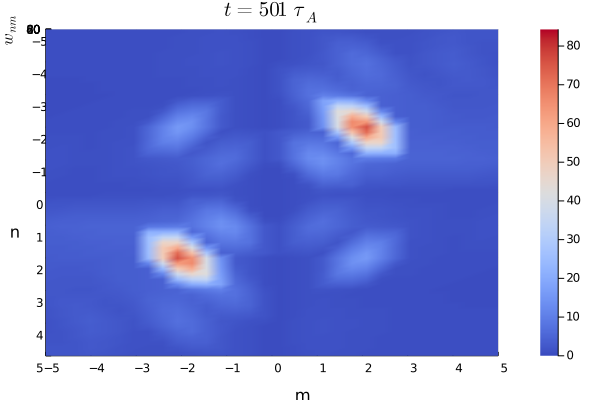

In [118]:
deg=90
Plots.scatter(nisl,misl,isl_width,zlabel=L"$w_{nm}$",camera=(deg,deg),st=:surface,c=:coolwarm,xlims=(-5,5),ylims=(-5,5) #=xlims=(-(Nn/2),Nn/2),ylims=(-Nm/2,Nm/2)=#,xticks=-5:1:5, yticks=-5:1:5#=xminorticks=5,yminorticks=10=#)
xlabel!("n")
ylabel!("m")
title!(L"t = 501 \; \tau_{A}")

## Sorting islands

In [32]:
sort!(islands,by = x->x[3],rev=true);

In [33]:
islands[1:20]

20-element Array{Any,1}:
 (-2, 2, 84.3244160907829)
 (2, -2, 84.3244160907829)
 (-2, -2, 17.3551798806194)
 (2, 2, 17.3551798806194)
 (-1, 1, 15.332467203714293)
 (1, -1, 15.332467203714293)
 (1, -3, 9.031547102926307)
 (-1, 3, 9.031547102926304)
 (2, -4, 7.623214885021391)
 (-2, 4, 7.623214885021389)
 (-1, -1, 7.475379259916195)
 (1, 1, 7.475379259916193)
 (-2, 1, 6.177317459118114)
 (2, -1, 6.177317459118114)
 (-3, 1, 4.664412131504984)
 (3, -1, 4.664412131504984)
 (-4, 1, 4.583741468960186)
 (4, -1, 4.583741468960186)
 (2, -3, 4.407480234840176)
 (-2, 3, 4.407480234840175)

In [35]:
sort!(islands3,by = x->x[3],rev=true);

In [36]:
islands3[1:20]

20-element Array{Any,1}:
 (-1, 1, 83.92442154071038)
 (1, -1, 83.92442154071037)
 (1, 1, 37.2785645811189)
 (-1, -1, 37.27856458111889)
 (-1, 6, 6.71978146735797)
 (1, -6, 6.719781467357962)
 (-1, 7, 6.520581381654719)
 (1, -7, 6.520581381654706)
 (1, 5, 6.467185403591468)
 (-1, -5, 6.467185403591467)
 (1, -8, 6.411525222286122)
 (-1, 8, 6.411525222286114)
 (-1, -6, 6.375930204079599)
 (1, 6, 6.375930204079595)
 (-1, 9, 6.348620913302763)
 (1, -9, 6.348620913302762)
 (-1, -7, 6.3022897808219005)
 (1, 7, 6.3022897808218925)
 (-1, 10, 6.294164860239154)
 (1, -10, 6.294164860239146)

## Plotting of harmonics

In [104]:
# Construction of grid
m_grid = LinRange(fftUtils.m_mode_num((Nm+1)/2,Nm),fftUtils.m_mode_num((Nm+1)/2+1,Nm),Nm);
psi_grid = LinRange(0,1,size(F)[1]);

In [105]:
# shifting the frequencies to center them to zero and reversing in the theta dimension
sF1 = fftshift(F1,2);
rsF1 = reverse(sF1,dims = 2);
sF2 = fftshift(F2,2);
rsF2 = reverse(sF2,dims = 2);
sF3 = fftshift(F3,2);
rsF3 = reverse(sF3,dims = 2);
sF4 = fftshift(F4,2);
rsF4 = reverse(sF4,dims = 2);

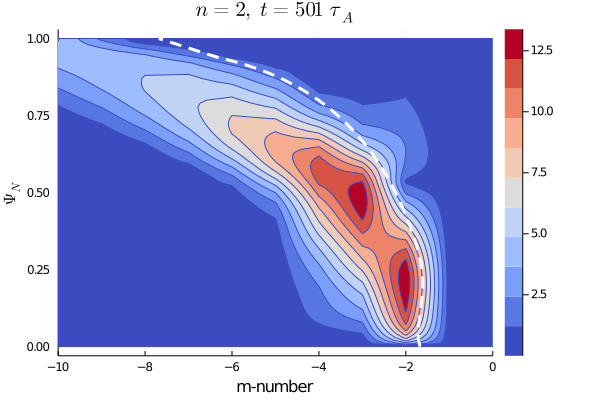

In [113]:
n_harmonic = 2
Plots.contourf(m_grid,psi_grid,abs.(rsF4[:,:,n_harmonic+1]),levels=10,c=:coolwarm,xlim=(-10,0)#=xlim=(-Nm/2,Nm/2)=#,right_margin=10mm)
Plots.plot!(n_harmonic .*q[:,t1],psi_grid,linestyle=:dash,linewidth=3.0,legend=false,c=:white)
title!(L"n=2,\; t = 501 \;\tau_A")
xlabel!("m-number")
ylabel!(L"\Psi_N")

## Movie of modes

In [51]:
ymin = -20.0;
ymax = 10.6;
anim = Plots.Animation()
for t in 1:tdim
    Plots.plot(psi_grid,imag(F[:,fftUtils.m_mode_ind(1,Nm),fftUtils.n_mode_ind(1,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="red",labels=("m=1,n=1"),legend=:bottomright)
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(2,Nm),fftUtils.n_mode_ind(1,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="blue",labels=("m=2,n=1"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-3,Nm),fftUtils.n_mode_ind(1,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="fuchsia",labels=("m=-3,n=1"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-4,Nm),fftUtils.n_mode_ind(1,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="slateblue1",labels=("m=-4,n=1"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-2,Nm),fftUtils.n_mode_ind(2,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="green",labels=("m=-2,n=2"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-1,Nm),fftUtils.n_mode_ind(3,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="salmon",labels=("m=-1,n=3"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-2,Nm),fftUtils.n_mode_ind(4,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="gold",labels=("m=-2,n=4"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-1,Nm),fftUtils.n_mode_ind(1,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="black",labels=("m=-1,n=1"))
    Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(-2,Nm),fftUtils.n_mode_ind(3,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="aquamarine",labels=("m=-2,n=3"))
    #Plots.plot!(psi_grid,imag(F[:,fftUtils.m_mode_ind(8,Nm),fftUtils.n_mode_ind(3,Nn),t]),xlims=(0,1),ylims=(ymin,ymax),color="black",labels=("m=8,n=3"))
    #Plots.plot!(psin_list,c*imag(bnmt[:,end-2,2,t]),xlims=(0,1),ylims=(-6.8,6.8),color="green",labels=("m=3,n=1"))
    #Plots.plot!(psin_list,c*imag(bnmt[:,end-2,3,t]),xlims=(0,1),ylims=(-6.8,6.8),color="black",labels=("m=3,n=2"))
    #Plots.plot!(psin_list,c*imag(bnmt[:,end-4,4,t]),xlims=(0,1),ylims=(-6.8,6.8),color="blue",labels=("m=5,n=3"))
    #Plots.plot!(psin_list,c*imag(bnmt[:,end-7,5,t]),xlims=(0,1),ylims=(-6.8,6.8),color="magenta",labels=("m=8,n=5"))
    xlabel!(L"$\Psi_n$")
    ylabel!(L"$\textrm{Im}(\hat{b}^{\rho}_{m/n})$")
    time=t
    annotate!((0.9,1.3,"t="*string(time*10)))
    Plots.frame(anim)
end

┌ Info: Saved animation to 
│   fn = /turquoise/users/giannis_kx/Julia/tmp.gif
└ @ Plots /users/giannis_kx/.julia/packages/Plots/Awg62/src/animation.jl:104


Plots.AnimatedGif("/turquoise/users/giannis_kx/Julia/tmp.gif")
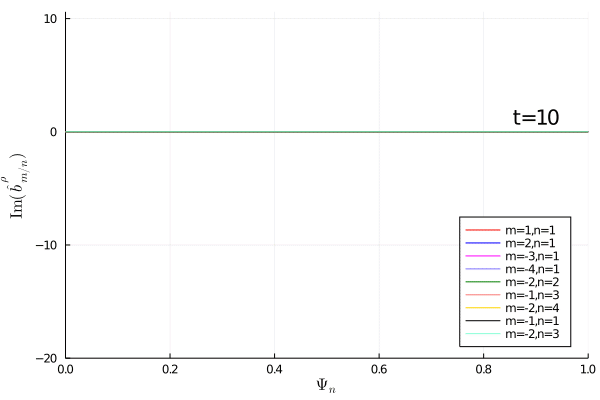

In [52]:
gif(anim,fps=30)